# Límites de la Precisión

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing()
from scipy import optimize

In [2]:
def bisection(f, a, b, n, tol=1e-16):
    fa = f(a)
    fb = f(b)
    x = np.empty(n)
    
    # Just checking if the sign is not negative => not root  necessarily 
    if np.sign(f(a)*f(b)) >= 0:
        print('f(a)f(b)<0 not satisfied!')
        return None
    i = 0
    while (b-a) / 2 > tol and i < n:
        c = (a + b) / 2.
        x[i] = c
        fc = f(c)
        if fc == 0:
            x = x[:i+1]
            break
        elif np.sign(fa*fc) < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
        i += 1
        
    return x

In [3]:
def fpi(g, x0, n, tol=1e-10):
    x = np.empty(n+1)
    x[0] = x0
    for i in range(n):
        x[i+1] = g(x[i])
        if np.abs(x[i+1] - x[i]) < tol:
            x = x[:i+2]
            break
    return x

In [4]:
def secant(f, x0, x1, n, tol=1e-10):
    x = np.zeros(n + 2)
    x[0] = x0
    x[1] = x1
    for i in range(1, n + 1):
        x[i+1] = x[i] - (f(x[i]) * (x[i] - x[i-1])) / (f(x[i]) - f(x[i-1]))
        if np.abs(x[i+1] - x[i]) < tol:
            x = x[:i+1]
            break
    return x

In [5]:
def newton_raphson(f, fp, x0, n, m=1, tol=1e-10):
    x = np.empty(n + 1)
    x[0] = x0
    for i in range(n):
        x[i+1] = x[i] - f(x[i]) / fp(x[i])
        if np.abs(x[i+1] - x[i]) < tol or f(x[i+1]) == 0:
            x = x[:i+2]
            break
    return x

# Backward y Forward Error 

Analicemos la función
\begin{equation}
    f(x) = \left(x-\frac{2}{3}\right)^3 = x^3 - 2x^2 + \frac{4}{3}x-\frac{8}{27}
\end{equation}

donde su raíz es $x=2/3$ con multiplicidad $3$.

In [6]:
f = lambda x: (x - 2 / 3) ** 3
fp = lambda x: 3 * (x - 2 / 3) ** 2

In [7]:
error = lambda x, r: np.abs(x - r)

In [8]:
def plotError(f, a, r):
    plt.figure(figsize=(12, 6))
    plt.plot(error(f(a), 0), 'r-o', label='Backward Error')
    plt.plot(error(a, r), 'b-o', label="Forward Error")
    plt.yscale('log')
    plt.xlabel("# Iteraciones")
    plt.ylabel("Error")
    plt.grid(True)
    plt.legend()
    plt.show()

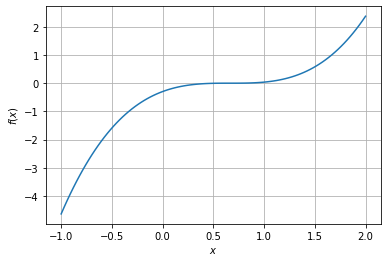

In [9]:
x = np.linspace(-1, 2, 100)
plt.plot(x, f(x))
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.grid(True)
plt.show()

In [10]:
# Solución
r = 2/3

### Bisección

In [11]:
a, b = .5, .7
n_b = 50
x_b = bisection(f, a, b, n_b)
x_b[-1]

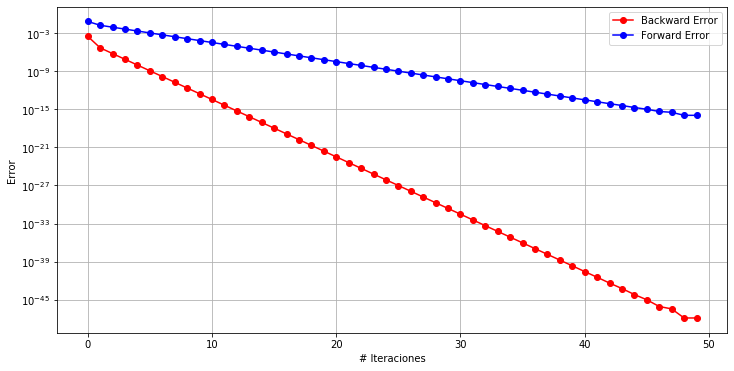

In [12]:
plotError(f, x_b, r)

### Secante

In [13]:
x0 = .6
x1 = .7
n = 50
x_s = secant(f, x0, x1, n)
x_s[-1]

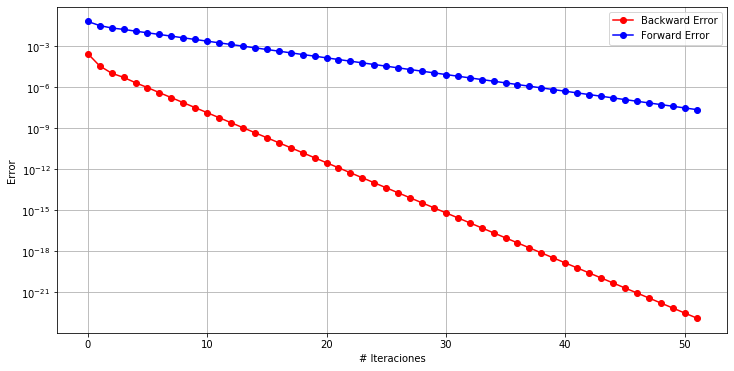

In [14]:
plotError(f, x_s, r)

### Newton-Raphson

In [15]:
x0 = .6
n = 50
x_n = newton_raphson(f, fp, x0, n, 3)
x_n[-1]

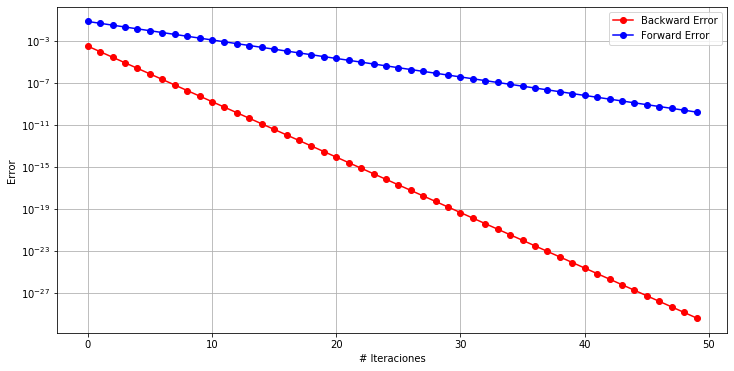

In [16]:
plotError(f, x_n, r)

De acuerdo a lo revisado en clases y analizando los resultados, el **backward error** $|f(x_a)|$ decae rápidamente pero esto no implica que el **forward error** $|r-x_a|$ lo haga a la misma velocidad. Cuando un problema no está bien condicionado, no podemos asegurar que el comportamiento de ambos errores esté directamente relacionado.

# Wilkinson Polynomial

Este polinomio tiene un comportamiento interesante. Si bien sus raíces son evidentes, al utilizar los métodos revisados no vamos a obtener exactamente sus raíces.

In [17]:
# Construccion de W(x)
x = sym.symbols('x', reals=True)
Wf = np.prod(x - np.arange(1, 21))
Wf # W(x)

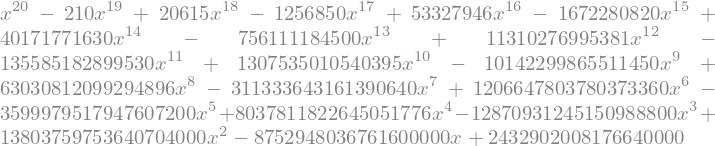

In [18]:
# Expansión del polinomio
We = sym.expand(Wf)
We

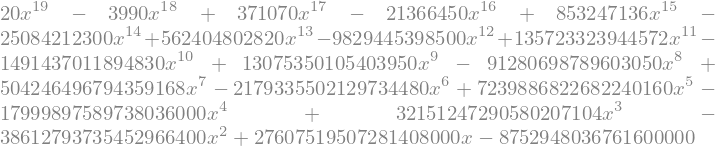

In [19]:
# Derivada version expandida
Wep = sym.diff(We, x)
Wep

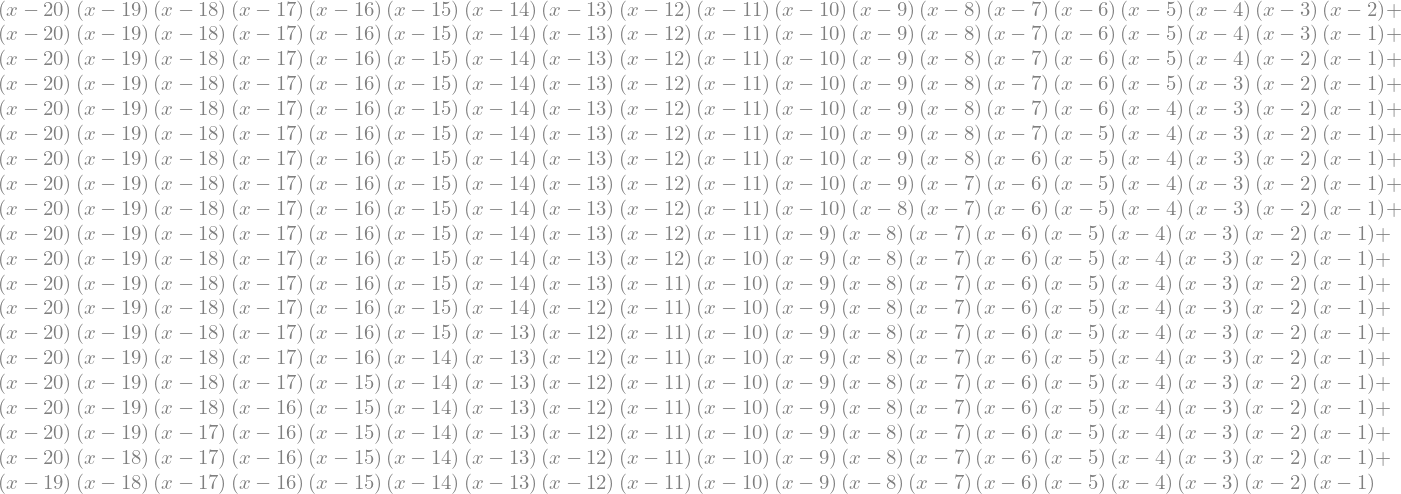

In [20]:
# Derivada version factorizada
Wd = sym.diff(Wf, x)
Wd

In [21]:
# Transformar a funcion lambda para podes evaluar con nuestros métodos
# Version expandida
P = sym.lambdify(x, We) # def P(x): ... o P = lambda x: ...
Pp = sym.lambdify(x, Wep)
# Factorizada
W = sym.lambdify(x, Wf)
Wp = sym.lambdify(x, Wd)

Solo para visualizar...

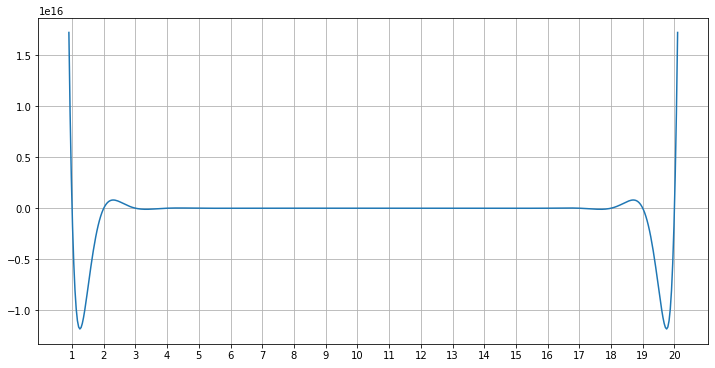

In [22]:
x1 = np.linspace(0.9, 20.1, 500)
px = W(x1)
plt.figure(figsize=(12, 6))
plt.plot(x1, px)
plt.xticks(np.arange(1, 21))
plt.grid(True)
plt.show()

Con el gráfico $\log(f(x))$ no se verán los valores negativos pero verificamos que sus raíces sean las que corresponden.

¿Qué pasa con la raíz $x=16$? Notar que ocurre en un vecindario a $x=16$...

In [23]:
P(16 - .1), P(16.0), P(16), P(16 + .1)

In [24]:
W(16 - .1),  W(16), W(16.0), W(16 + .1)

¿Por qué la diferencia del polinomio expandido y el factorizado?

## Bisección

In [25]:
r_w = 16

In [26]:
a, b = r_w - 0.1, r_w + 0.1
n_b = 100
x_b = bisection(P, a, b, n_b, 1e-16)
x_b[-1]

In [27]:
x_b[-1], P(x_b[-1]), W(x_b[-1])

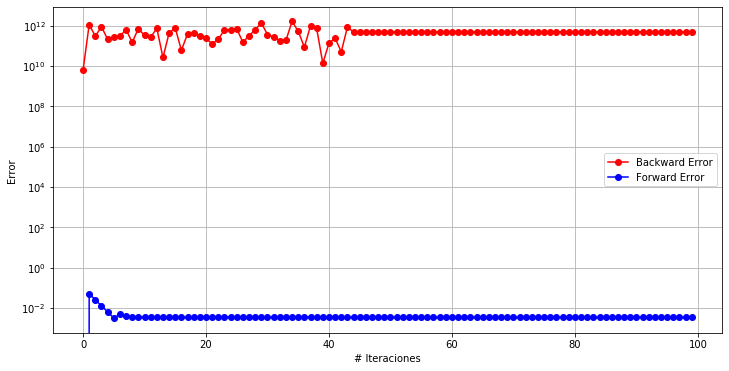

In [28]:
plotError(P, x_b, r_w)

## Secante

In [29]:
x0 = r_w - .1
x1 = r_w + .1
n_s = 1000
x_s = secant(P, x0, x1, n_s, 1e-16)
x_s[-1]

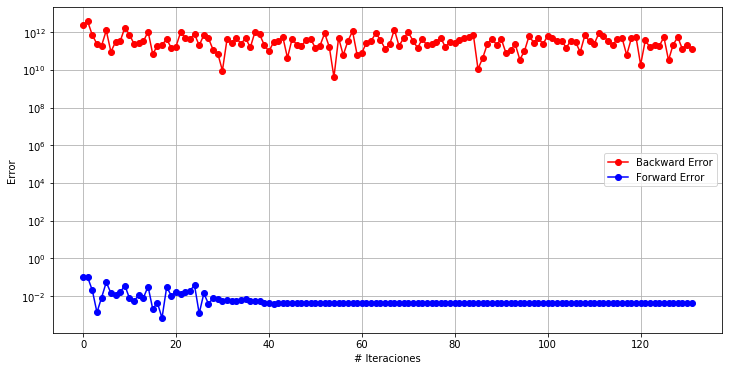

In [30]:
plotError(P, x_s, r_w)

In [31]:
x0 = r_w - .1
n_n = 100
x_n = newton_raphson(P, Pp, x0, n_n, 1e-16)
x_n[-1]

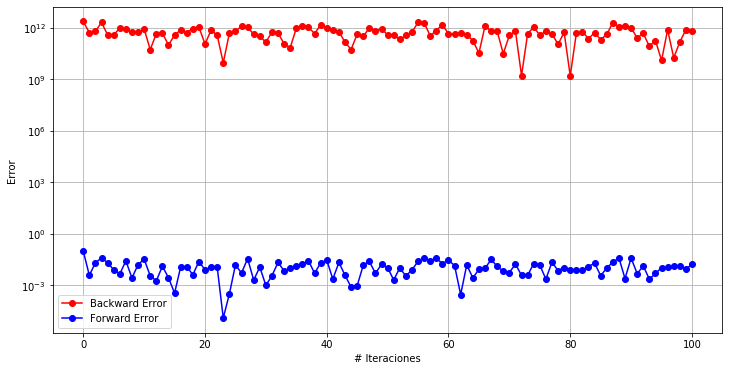

In [32]:
plotError(P, x_n, r_w)

In [33]:
x_b[-1]-16

In [34]:
print(error(x_b[-1], r_w), error(x_s[-1], r_w), error(x_n[-1], r_w))

0.0033284982507311156 0.004299420643381069 0.017405068783038047


En clases derivamos que $\Delta r \approx \pm 0.0136$ que se acerca más o menos a los resultados experimentales. ¿Podemos concluir con la información del **backward error**?, ¿Es un problema bien o mal condicionado?

---

# Comentario Iteración Punto Fijo!

Recordemos el teorema de Taylor y tomando una idea similar al *Método de Newton-Raphson*, realicemos la siguiente expansión de $f(x)$ en torno a la raíz $r$:

\begin{equation}
    \begin{split}
        f(x) & = f(r) + f'(r)(x-r) + O(x^2) \\
        f(x) & = 0 + f'(r)(x-r) + O(x^2) \quad \frac{1}{f'(r)}, f'(r)\neq 0 \\
        \frac{f(x)}{f'(r)} & = 0 + (x-r) + O(x^2) \\
        r = x - \frac{f(x)}{f'(r)} + O(x^2).
    \end{split}
\end{equation}

Despreciando los términos $O(x^2)$ construyamos una iteración del tipo:
\begin{equation}
    \begin{split}
        x_{i+1} & = x_i + \alpha \, f(x_i) \\
         & = g(x_i),
    \end{split}
\end{equation}

donde $\alpha = -\frac{1}{f'(r)}$ es un parámetro conveniente que nos asegure $|g'(r)| < 1$.

Si analizamos la expresión:
\begin{equation}
    \begin{split}
        g(x) & = x + \alpha f(x) \\
        g'(x) & = 1 + \alpha f'(x),
    \end{split}
\end{equation}

la idea es que $|1 + \alpha f'(x)| < 1$ cuando $x\to r$.

In [35]:
G = lambda x, f, a: x + a * f(x)

Ejemplos...

In [36]:
f1 = lambda x: 2 - x ** 2

Probemos para distintos $\alpha$:

In [37]:
g1 = lambda x: G(x, f1, .5)
g2 = lambda x: G(x, f1, .1)

In [38]:
x0 = 1
n = 100

In [39]:
x_g_1 = fpi(g1, x0, n)

In [40]:
x_g_1, x_g_1.shape

(array([1.        , 1.5       , 1.375     , 1.4296875 , 1.40768433,
        1.41689675, 1.41309855, 1.41467479, 1.41402241, 1.41429272,
        1.41418077, 1.41422714, 1.41420794, 1.41421589, 1.4142126 ,
        1.41421396, 1.4142134 , 1.41421363, 1.41421353, 1.41421357,
        1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356,
        1.41421356, 1.41421356]),
 (27,))

In [41]:
x_g_2 = fpi(g2, x0, n)

In [42]:
x_g_2, x_g_2.shape

(array([1.        , 1.1       , 1.179     , 1.2399959 , 1.28623692,
        1.32079638, 1.34634607, 1.3650813 , 1.3787366 , 1.38864514,
        1.39581161, 1.4009826 , 1.40470738, 1.4073871 , 1.40931325,
        1.41069687, 1.4116903 , 1.41240335, 1.41291503, 1.41328214,
        1.4135455 , 1.41373441, 1.41386991, 1.4139671 , 1.4140368 ,
        1.4140868 , 1.41412265, 1.41414836, 1.4141668 , 1.41418003,
        1.41418951, 1.41419632, 1.41420119, 1.41420469, 1.4142072 ,
        1.414209  , 1.41421029, 1.41421122, 1.41421188, 1.41421236,
        1.4142127 , 1.41421294, 1.41421312, 1.41421324, 1.41421333,
        1.4142134 , 1.41421344, 1.41421348, 1.4142135 , 1.41421352,
        1.41421353, 1.41421354, 1.41421355, 1.41421355, 1.41421355,
        1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356,
        1.41421356, 1.41421356, 1.41421356, 1.41421356, 1.41421356,
        1.41421356]),
 (66,))

In [43]:
r1 = np.sqrt(2)
print(np.abs(x_g_1[-1] - r1), np.abs(x_g_2[-1] - r1))

2.4623636463161347e-11 2.1262236415964253e-10


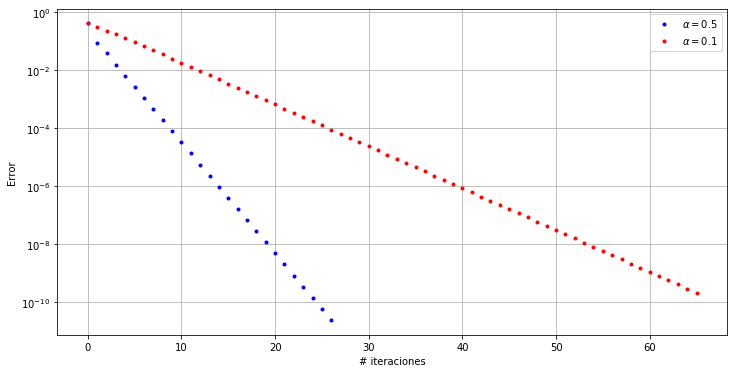

In [56]:
plt.figure(figsize=(12,6))
plt.plot(error(x_g_1, r1), 'b.', label=r"$\alpha=0.5$")
plt.plot(error(x_g_2, r1), 'r.', label=r"$\alpha=0.1$")
plt.yscale('log')
plt.xlabel("# iteraciones")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()

Según el $\alpha$ que utilicemos podemos asegurar convergencia, incluso mejorar la tasa!

Otro ejemplo!

In [45]:
f2 = lambda x: x ** 2 - x - 1

In [46]:
g3 = lambda x: G(x, f2, -.4) 
g4 = lambda x: G(x, f2, -.8)

Recordar que $\alpha \approx -1/f'(r)$, y $f'(x) =2x-1$. Como $f'(x) > 0$ cerca de $r$ entonces $\alpha < 0$. Esa es la razón de utilizar valores negativos...

In [47]:
x0 = 1
n = 100

In [48]:
x_g_3 = fpi(g3, x0, n)

In [49]:
x_g_3, x_g_3.shape

(array([1.        , 1.4       , 1.576     , 1.6128896 , 1.6174803 ,
        1.61797541, 1.6180278 , 1.61803334, 1.61803392, 1.61803398,
        1.61803399, 1.61803399, 1.61803399]),
 (13,))

In [50]:
x_g_4 = fpi(g4, x0, n)

In [51]:
x_g_4, x_g_4.shape

(array([1.        , 1.8       , 1.448     , 1.7290368 , 1.52061164,
        1.68729315, 1.55956113, 1.6614253 , 1.58229832, 1.6452026 ,
        1.59601141, 1.6350186 , 1.60440482, 1.62863682, 1.60957997,
        1.6246458 , 1.61278326, 1.622154  , 1.61477032, 1.62060002,
        1.61600449, 1.61963167, 1.61677161, 1.61902855, 1.61724863,
        1.61865303, 1.61754535, 1.61841926, 1.61772995, 1.61827376,
        1.6178448 , 1.6181832 , 1.61791626, 1.61812685, 1.61796073,
        1.61809177, 1.6179884 , 1.61806995, 1.61800562, 1.61805637,
        1.61801634, 1.61804791, 1.618023  , 1.61804265, 1.61802715,
        1.61803938, 1.61802973, 1.61803734, 1.61803134, 1.61803608,
        1.61803234, 1.61803529, 1.61803296, 1.6180348 , 1.61803335,
        1.61803449, 1.61803359, 1.6180343 , 1.61803374, 1.61803418,
        1.61803384, 1.61803411, 1.61803389, 1.61803406, 1.61803393,
        1.61803404, 1.61803395, 1.61803402, 1.61803397, 1.61803401,
        1.61803397, 1.618034  , 1.61803398, 1.61

In [52]:
r2 = (1 + np.sqrt(5)) / 2

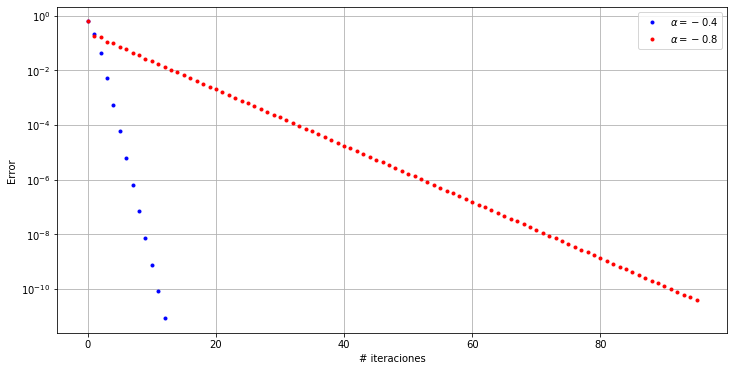

In [57]:
plt.figure(figsize=(12,6))
plt.plot(error(x_g_3, r2), 'b.', label=r"$\alpha=-0.4$")
plt.plot(error(x_g_4, r2), 'r.', label=r"$\alpha=-0.8$")
plt.yscale('log')
plt.xlabel("# iteraciones")
plt.ylabel("Error")
plt.legend()
plt.grid(True)
plt.show()

Quizás esta herramienta pueda ser útil para construir iteraciones de punto fijo...